# **1. Problem Statement**

Selama lebih dari dua tahun terakhir, DKI Jakarta dihadapkan pada kompleksitas permasalahan pandemi COVID-19. Bahkan, per tanggal 10 Juli 2022, Satgas COVID-19 Indonesia (2022) melaporkan bahwa DKI Jakarta menjadi provinsi dengan jumlah kasus positif tertinggi di Indonesia. Selain itu, provinsi ini masih memiliki *positivity rate* yang tinggi, yakni 71,86 kasus/100 ribu penduduk/minggu. Angka ini jauh di atas *positivity rate* Indonesia, yakni 5,64 kasus/100 ribu penduduk/minggu. Kompleksitas ini tidak dapat terlepas dari karakteristik pandemi ini sendiri yang menyebar secara cepat melalui kontak fisik. Mobilitas penduduk DKI Jakarta yang tinggi menjadi faktor pendorong penyebaran COVID-19 yang masif di Indonesia. Kebijakan terkait pencegahan COVID-19 mesti diupayakan sedini mungkin, termasuk kebijakan pembatasan sosial. Kebijakan pembatasan sosial perlu dilakukan sebelum puncak mobilitas itu benar-benar terjadi dan COVID-19 tidak dapat dikendalikan. 
 
Fenomena mobilitas yang tidak dapat diprediksi dan dihalau sebelumnya oleh pemerintah menyebabkan pandemi ini telah terlanjur menyebar. Pemerintah dinilai terlambat dalam mengambil tindakan. Pemerintah baru mengambil tindakan setelah peningkatan mobilitas ini terjadi atau bahkan saat terjadi peningkatan kasus positif COVID-19 yang signifikan. Akibatnya, kasus positif COVID-19, yang awalnya sudah mereda, kembali meningkat hingga beberapa kali gelombang lonjakan kasus. Per 2 Februari 2022, DKI Jakarta tercatat telah mengalami dua kali lonjakan kasus dan telah menunjukkan indikasi menuju gelombang ketiga (Arifa, 2022). Dengan demikian, hal ini tentunya memperlambat masa recovery di DKI Jakarta, baik itu recovery dari sisi ekonomi, sosial, dan pendidikan.
 
Dalam mendukung tindakan preventif yang lebih dini, tren mobilitas masyarakat DKI Jakarta perlu dianalisis secara mendalam beserta signfikansi dampaknya terhadap peningkatan kasus COVID-19 di masa mendatang. Selain itu, prediksi kasus positif harian yang akan terjadi melalui data mobilitas masyarakat juga perlu dilakukan. Oleh karena itu diperlukan analisis model mobilitas masyarakat DKI Jakarta dan prediksi kasus positif harian melalui data mobilitas ini untuk menentukan urgensi pentingnya kebijakan pembatasan dan sektor mana yang perlu diperhatikan secara lebih mendalam. 


# **2. Data Cleaning and Preprocessing**

## 2.1 Import Library

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

In [428]:
from scipy import stats
from sklearn import metrics
import statsmodels as sm

In [429]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

## 2.2 Data Preprocessing

In [430]:
# Muat dataset yang akan digunakan
df1 = pd.read_excel('Mobility Data.xlsx')
df2 = pd.read_excel('COVID Data.xlsx', sheet_name='Data Jakarta')

Dataset yang digunakan pada analisis adalah data mobilitas masyarakat DKI Jakarta yang didapat melalui https://www.google.com/covid19/mobility  selama pandemi dan data agregat kasus COVID-19 di DKI Jakarta yang didapat melalui https://corona.jakarta.go.id/id.

Pertama-tama, dilakukan pengecekan dataframe untuk masing-masing dataset.

In [431]:
df1.head(5)

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,4,10,-11,6,6,0
1,2020-03-02,6,24,5,5,6,-1
2,2020-03-03,3,17,-1,3,5,0
3,2020-03-04,-2,4,-8,1,4,1
4,2020-03-05,3,8,1,4,5,0


In [432]:
df2.head(5)

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Meninggal per hari
0,2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN,1
3,2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN,0
4,2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN,2


Pada dataframe ke-2, variabel yang akan digunakan adalah kolom "Positif Harian" dan "Tanggal". Berdasarkan penelitian yang dilakukan oleh World Health Organization, masa inkubasi COVID-19 adalah selama 1 - 14 hari (WHO, 2020). Pada analisis ini, masa inkubasi COVID-19 diasumsikan selama 14 hari, sehingga terdapat lag value pada variabel "Positif Harian" sebesar -14.

In [433]:
df2['Positif Harian'] = df2['Positif Harian'].shift(-14)
df2

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Meninggal per hari
0,2020-03-01,NaN,NaN,0,0,0,0,0,16.00,0,0,NaN,NaN,NaN,0
1,2020-03-02,NaN,NaN,0,0,0,0,0,2.00,0,0,NaN,NaN,NaN,0
2,2020-03-03,NaN,NaN,1,0,0,2,3,25.00,2,0,NaN,NaN,NaN,1
3,2020-03-04,NaN,NaN,1,0,0,2,3,38.00,2,0,NaN,NaN,NaN,0
4,2020-03-05,NaN,NaN,3,0,0,4,7,50.00,4,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2022-06-27,NaN,NaN,15313,1242286,7901,602,1266102,NaN,8503,857,0.00,27.00,8476.00,0
849,2022-06-28,NaN,NaN,15314,1243032,8375,631,1267352,NaN,9006,746,0.00,27.00,8979.00,1
850,2022-06-29,NaN,NaN,15314,1243738,8801,633,1268486,NaN,9434,706,0.00,27.00,9407.00,0
851,2022-06-30,NaN,NaN,15315,1244833,8926,667,1269741,NaN,9593,1095,0.00,27.00,9566.00,1


Untuk menyamakan format dari kedua dataframe, perlu dilakukan parse pada masing-masing kolom yang mengandung tanggal.

In [434]:
df1['date'] = pd.to_datetime(df1.date, format = '%d/%m/%Y')
df2['Tanggal'] = pd.to_datetime(df2.Tanggal, format = '%d/%m/%Y')

Kolom yang digunakan pada dataframe ke-2 adalah "Tanggal" dan "Positif Harian" sehingga dapat dilakukan drop pada kolom lainnya.

In [435]:
df2.drop(df2.columns.difference(['Tanggal','Positif Harian']), 1, inplace=True)
df2

,Tanggal,Positif Harian
0,2020-03-01,16.00
1,2020-03-02,2.00
2,2020-03-03,25.00
3,2020-03-04,38.00
4,2020-03-05,50.00
...,...,...
848,2022-06-27,NaN
849,2022-06-28,NaN
850,2022-06-29,NaN
851,2022-06-30,NaN


Dataframe 1 dan 2 dapat digabungkan dengan metode Inner Join pada kolom yang berisi tanggal.

In [436]:
df = pd.merge(df1, df2, how="inner", left_on = 'date', right_on = 'Tanggal')

Kolom "Tanggal" pada dataframe 2 sudah tidak dibutuhkan, sehingga dapat dilakukan drop.

In [437]:
df = df.drop('Tanggal', axis=1)

Untuk memudahkan penulisan kode, dilakukan penamaan ulang kolom-kolom dengan nama yang lebih singkat.

In [438]:
df.columns = ['tanggal', 'retail_rekreasi', 'perbelanjaan_farmasi', 'taman', 'stasiun', 'tempat_kerja', 'permukiman', 'kasus_positif']
df

,tanggal,retail_rekreasi,perbelanjaan_farmasi,taman,stasiun,tempat_kerja,permukiman,kasus_positif
0,2020-03-01,4,10,-11,6,6,0,16.00
1,2020-03-02,6,24,5,5,6,-1,2.00
2,2020-03-03,3,17,-1,3,5,0,25.00
3,2020-03-04,-2,4,-8,1,4,1,38.00
4,2020-03-05,3,8,1,4,5,0,50.00
...,...,...,...,...,...,...,...,...
301,2020-12-27,-36,-17,-53,-33,-11,8,2711.00
302,2020-12-28,-28,-6,-48,-40,-36,13,2461.00
303,2020-12-29,-29,-8,-49,-40,-38,14,2669.00
304,2020-12-30,-28,-4,-50,-38,-38,13,3476.00


In [439]:
df.head(5)

,tanggal,retail_rekreasi,perbelanjaan_farmasi,taman,stasiun,tempat_kerja,permukiman,kasus_positif
0,2020-03-01,4,10,-11,6,6,0,16.00
1,2020-03-02,6,24,5,5,6,-1,2.00
2,2020-03-03,3,17,-1,3,5,0,25.00
3,2020-03-04,-2,4,-8,1,4,1,38.00
4,2020-03-05,3,8,1,4,5,0,50.00


Dilakukan pengecekan datatypes pada masing-masing kolom

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               306 non-null    datetime64[ns]
 1   retail_rekreasi       306 non-null    int64         
 2   perbelanjaan_farmasi  306 non-null    int64         
 3   taman                 306 non-null    int64         
 4   stasiun               306 non-null    int64         
 5   tempat_kerja          306 non-null    int64         
 6   permukiman            306 non-null    int64         
 7   kasus_positif         306 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 21.5 KB


Ubah variabel kasus_positif menjadi integer

In [441]:
df['kasus_positif'] = df['kasus_positif'].astype(int)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               306 non-null    datetime64[ns]
 1   retail_rekreasi       306 non-null    int64         
 2   perbelanjaan_farmasi  306 non-null    int64         
 3   taman                 306 non-null    int64         
 4   stasiun               306 non-null    int64         
 5   tempat_kerja          306 non-null    int64         
 6   permukiman            306 non-null    int64         
 7   kasus_positif         306 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 21.5 KB


Untuk mendapatkan hasil analisis dan modelling yang lebih akurat, perlu dipastikan agar data tidak memiliki nilai null dan duplikat.

In [443]:
df.isnull().sum()

tanggal                 0
retail_rekreasi         0
perbelanjaan_farmasi    0
taman                   0
stasiun                 0
tempat_kerja            0
permukiman              0
kasus_positif           0
dtype: int64

In [444]:
df.duplicated().sum()

0

Data yang digunakan tidak memiliki nilai yang hilang maupun duplikat, sehingga proses data cleaning telah selesai dan dapat dilanjutkan ke tahap analisis

# **3. Exploratory Data Analysis**

Dilakukan pengecekan parameter statistik deskriptif untuk mengetahui karakteristik data yang akan dianalisis.

In [445]:
df.describe()

,retail_rekreasi,perbelanjaan_farmasi,taman,stasiun,tempat_kerja,permukiman,kasus_positif
count,306.00,306.00,306.00,306.00,306.00,306.00,306.00
mean,-35.61,-12.89,-59.87,-45.13,-31.68,14.81,711.81
std,14.38,9.99,20.59,15.84,15.14,6.07,657.06
min,-68.00,-46.00,-96.00,-79.00,-78.00,-1.00,2.00
25%,-46.00,-18.00,-72.00,-55.75,-37.00,12.00,127.00
50%,-33.00,-12.00,-59.00,-43.00,-32.00,14.00,586.00
75%,-27.00,-7.00,-50.00,-38.00,-23.00,18.75,1102.00
max,10.00,24.00,19.00,6.00,8.00,34.00,3476.00


Pada bagian kolom-kolom perubahan mobilitas, hampir semua kolom memiliki rerata negatif kecuali pada kolom permukiman. Hal ini mengindikasikan bahwa zona-zona retail & rekreasi, perbelanjaan & farmasi, taman, stasiun dan tempat kerja mengalami penurunan mobilitas, sedangkan zona permukiman mengalami kenaikan mobilitas selama pandemi di tahun 2020.

Untuk mengetahui distribusi antar variabel, dapat dilakukan pairplot.

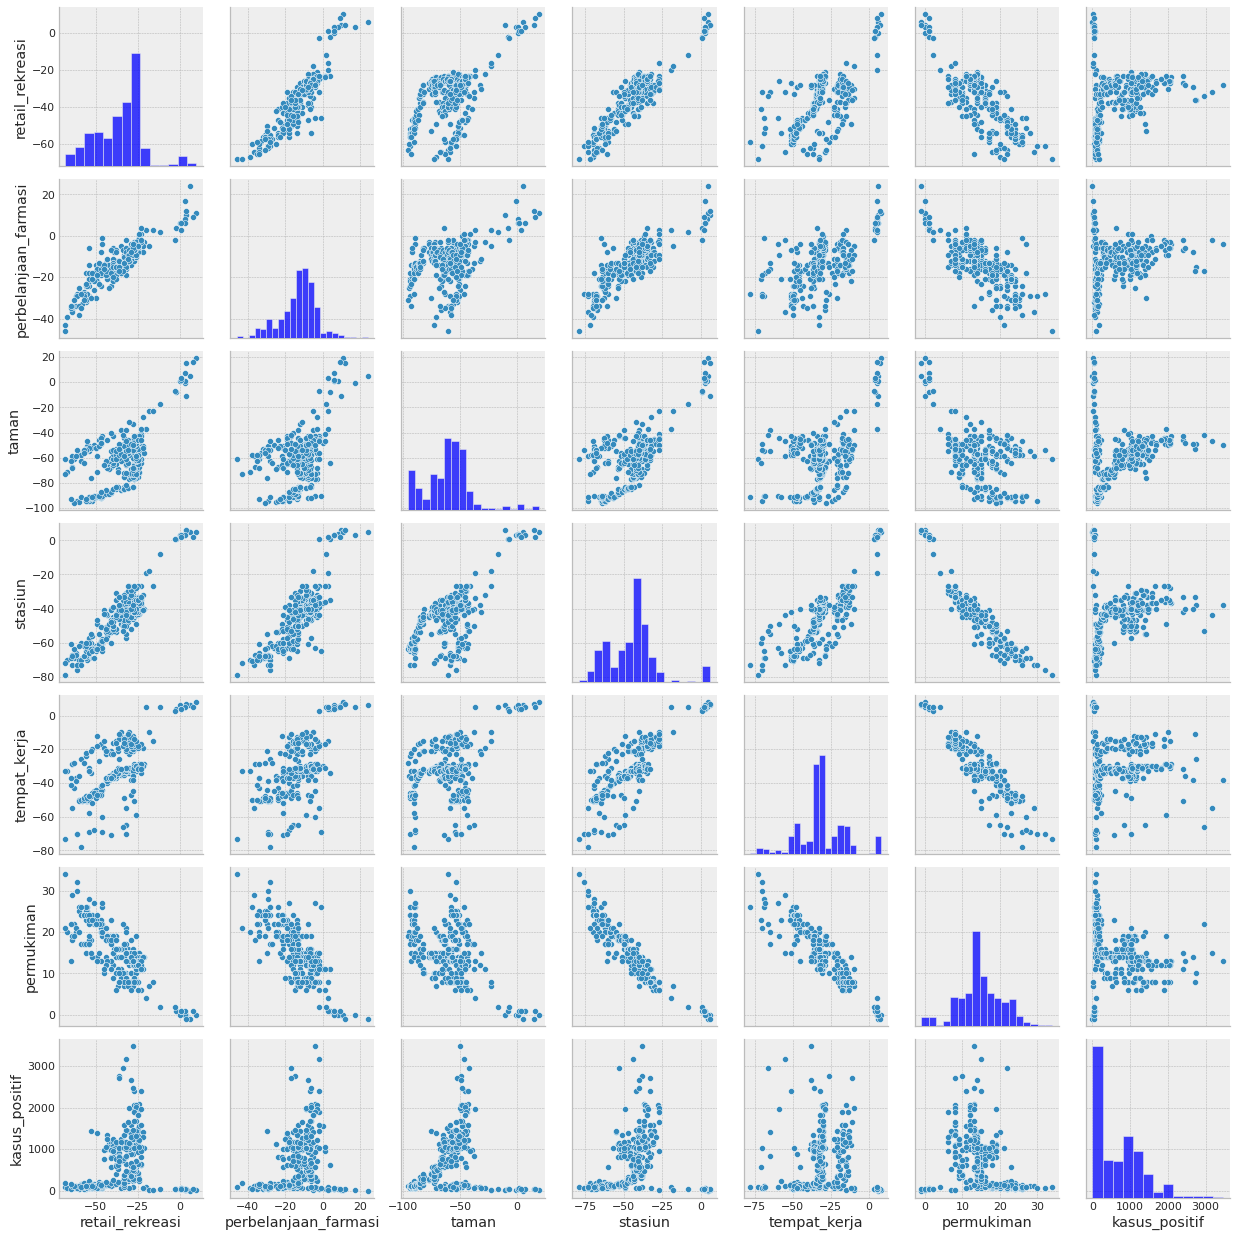

In [446]:
sns.pairplot(df)

Berdasarkan plot tersebut, dapat diketahui bahwa hubungan pada variabel-variabel mobilitas menunjukkan linearitas positif kecuali ketika dibandingkan dengan variabel permukiman yang memiliki linearitas negatif.

Hubungan antara kasus positif dengan variabel mobilitas menunjukkan linearitas positif yang tidak terlalu signifikan. Hal ini menunjukkan bahwa korelasi antara keduanya tidak terlalu tinggi. Namun, Karl Pearson menyatakan bahwa korelasi tidak mengimplikasikan penyebaban, sehingga mobilitas penduduk masih dapat menjadi penyebab dari kenaikan kasus positif selama pandemi.

Untuk memudahkan analisis, dilakukan penggantian index dataframe menjadi kolom tanggal.

In [447]:
df.index = df.tanggal

In [448]:
df = df.drop('tanggal', axis=1)

## 3.1 Analisis Variabel Target

Tujuan dari pemodelan yang akan dilakukan adalah memprediksi nilai pada variabel kasus_positif dari variabel-variabel lain. Oleh karena itu, harus dilakukan separasi antara fitur (kolom-kolom mobilitas) dengan target (kolom kasus positif)

In [449]:
target = df[['kasus_positif']]
target

,kasus_positif
tanggal,
2020-03-01,16
2020-03-02,2
2020-03-03,25
2020-03-04,38
2020-03-05,50
...,...
2020-12-27,2711
2020-12-28,2461
2020-12-29,2669


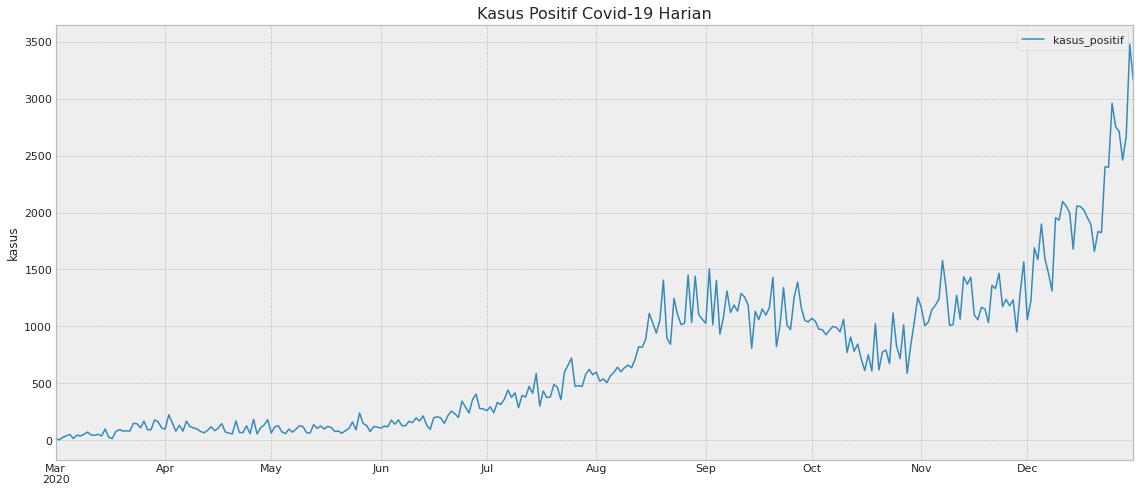

In [450]:
target.plot(lw=1.5, figsize=(16, 7))
plt.title('Kasus Positif Covid-19 Harian', fontsize=16)
plt.xlabel('')
plt.ylabel('kasus', fontsize=12);

Text(0, 0.5, 'Kasus Positif')

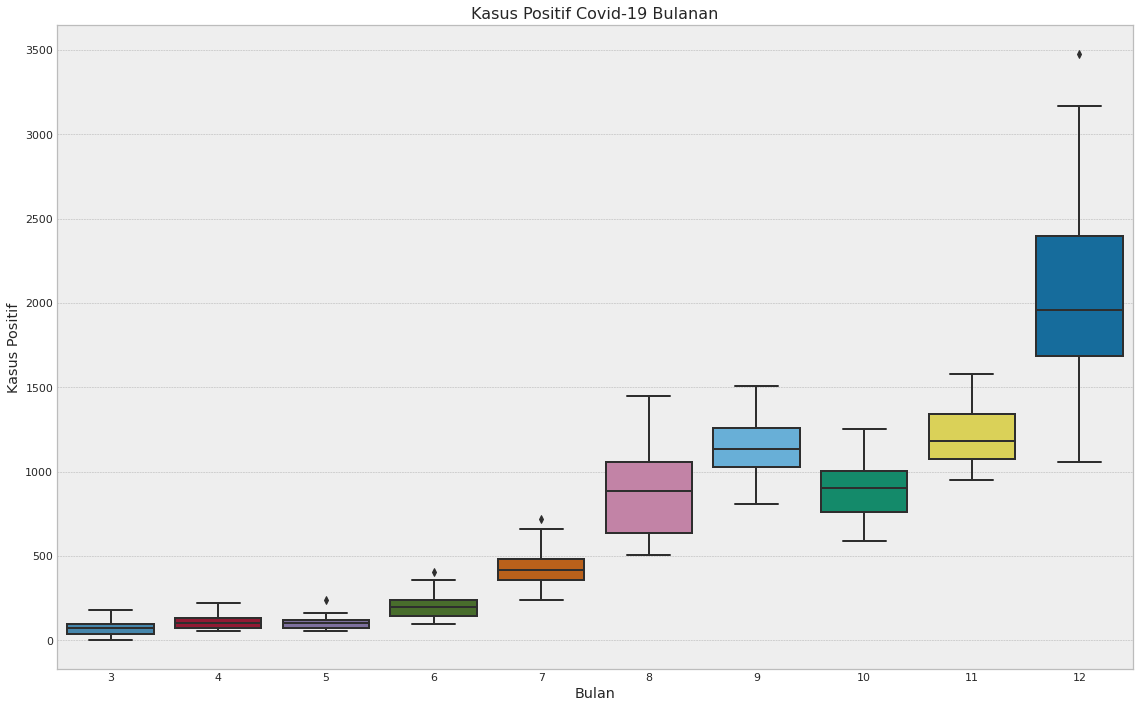

In [451]:
plt.figure(figsize=(16,10))

target_bulanan = target
target_bulanan['bulan'] = pd.DatetimeIndex(target_bulanan.index).month

ax = sns.boxplot(y='kasus_positif', x='bulan', data=target_bulanan, orient='v')

plt.title('Kasus Positif Covid-19 Bulanan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Kasus Positif')

Berdasarkan boxplot di atas, diketahui bahwa penambahan kasus positif COVID-19 terbanyak terjadi di bulan Agustus dan Desember tahun 2020.

Untuk melihat komparasi penambahan kasus positif pada weekdays dan weekend, dapat dilakukan T-test.

In [452]:
weekend = target.loc[target.index.weekday >= 5]['kasus_positif']
weekdays = target.loc[target.index.weekday < 5]['kasus_positif']

In [453]:
weekend

tanggal
2020-03-01      16
2020-03-07      44
2020-03-08      36
2020-03-14      37
2020-03-15      98
              ... 
2020-12-13    1997
2020-12-19    1895
2020-12-20    1657
2020-12-26    2753
2020-12-27    2711
Name: kasus_positif, Length: 87, dtype: int64

In [454]:
weekdays

tanggal
2020-03-02       2
2020-03-03      25
2020-03-04      38
2020-03-05      50
2020-03-06      14
              ... 
2020-12-25    2959
2020-12-28    2461
2020-12-29    2669
2020-12-30    3476
2020-12-31    3165
Name: kasus_positif, Length: 219, dtype: int64

In [455]:
stats.ttest_ind(weekend, weekdays, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.25341599768997436, pvalue=0.8002732511134479)

Hasil T-test menunjukkan nilai statistik lebih kecil daripada P-value sehingga **hipotesis null diterima** dan **tidak ada perbedaan mean yang signifikan** untuk data kasus positif pada weekdays dan weekend.

Lakukan dekomposisi pada variabel kasus positif

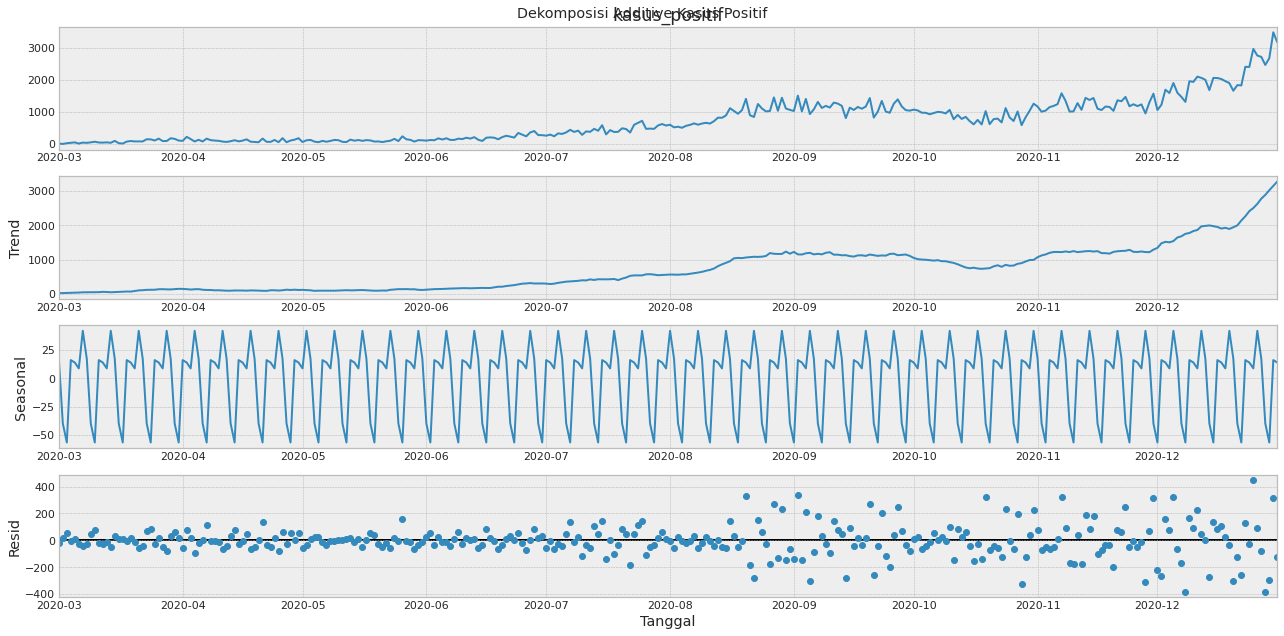

In [456]:
from statsmodels.tsa.seasonal import seasonal_decompose

dekomp_target = sm.tsa.seasonal_decompose(target['kasus_positif'], model = 'additive', extrapolate_trend='freq')

rcParams.update({'figure.figsize': (18, 9)})
dekomp_target.plot().suptitle('Dekomposisi Additive Kasus Positif')
plt.xlabel('Tanggal')
plt.show()

Berdasarkan dekomposisi yang telah dilakukan, diketahui bahwa penambahan kasus positif COVID-19 memiliki seasonality mingguan. Pada awal pekan, kasus positif umumnya mengalami penurunan dana akan terus meningkat menuju akhir pekan.

Pada rentang Bulan Maret-Juni atau ketika mobilitas di tempat umum(selain pemukiman) menurun, maka kasus positif covid menjadi rendah. Kemudian setelah Bulan Juni atau ketika mobilitas di tempat umum(selain pemukiman) meningkat, maka kasus positif covid juga meningkat. Kesimpulannya, mobilitas di tempat umum(tempat selain pemukiman) memiliki hubungan positif dengan peningkatan kasus covid-19.

## 3.2 Analisis Variabel Independen

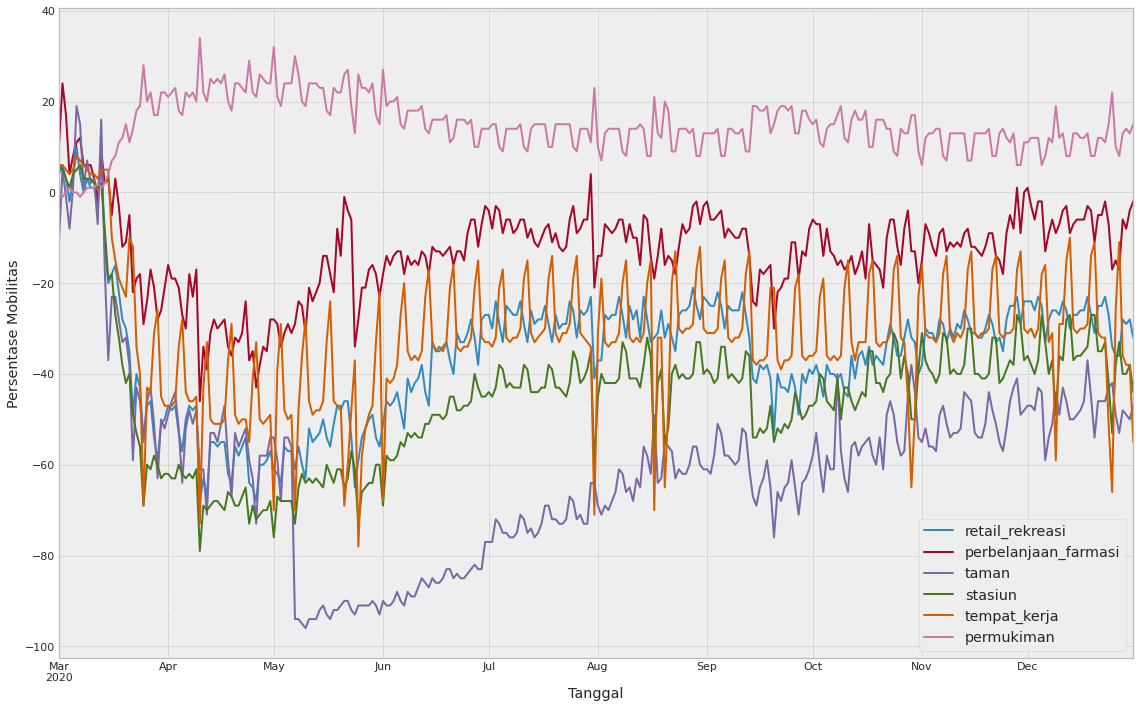

In [457]:
mobility= df.drop('kasus_positif', axis=1)
mobility.plot(figsize=(16, 10))
plt.legend(fontsize="large")
plt.xlabel("Tanggal")
plt.ylabel("Persentase Mobilitas");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f612a046b50>,
      dtype=object)

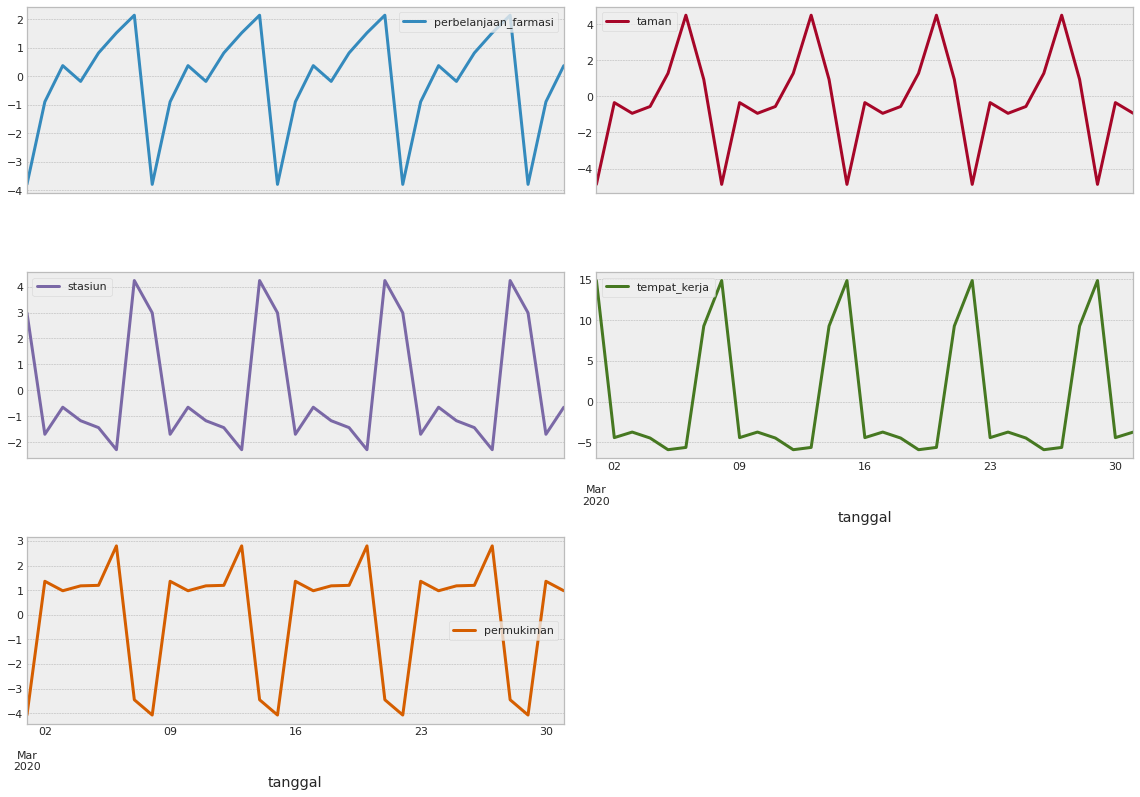

In [458]:
seasonality_dict = {}

for col in mobility.columns[1:]:
  decompositions = sm.tsa.seasonal_decompose(mobility[col])
  seasonality_dict[col] = decompositions.seasonal

rcParams["figure.figsize"] = 16, 14
rcParams["figure.autolayout"] = True

pd.DataFrame(seasonality_dict)["2020-03-01":"2020-03-31"].plot(subplots=True, layout=(4, 2), linewidth=3 )


Dalam analisis time-series, aspek seasonality perlu dipertimbangkan untuk mengetahui pola waktu puncak dan waktu terendahnya. Dalam data mobilitas di setiap waktu ditunjukkan nilai persentase mobilitas yang memiliki hidden seasonality. Untuk menganalisis hidden seasonality secara visual diperlukan langkah lanjutan, yakni time-series seasonal decomposition. Dalam grafik time-series seasonal decomposition terbagi atas segmen kecil harian yang dimulai pada hari Minggu. Melalui grafik ini diperoleh interpretasi bahwa seasonality mobilitas penduduk di setiap sektor bersifat weekly. Namun, di setiap sektor tersebut, waktu terjadinya mobilitas puncak dan mobilitas terendah mingguan berbeda-beda. 

Pada sektor retail dan rekreasi, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. Perubahan mobilitas tertinggi terjadi setiap hari Jumat, sedangkan perubahan mobilitas terendah terjadi setiap hari Minggu. Pada sektor perbelanjaan dan farmasi, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. perubahan mobilitas tertinggi terjadi setiap hari Sabtu, sdangkan perubahan mobilitas terendah terjadi setiap hari Minggu. Di taman, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. Perubahan mobilitas tertinggi terjadi setiap hari Jumat, sedangkan perubahan mobilitas terendah terjadi setiap hari Minggu. Di taman, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. Perubahan mobilitas tertinggi terjadi setiap hari Sabtu, sedangkan perubahan mobilitas terendah terjadi setiap hari Jumat. Di stasiun, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. Perubahan mobilitas tertinggi terjadi setiap hari Jumat, sedangkan perubahan mobilitas terendah terjadi setiap hari Minggu. Di tempat kerja, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. Perubahan mobilitas tertinggi terjadi setiap hari Minggu, sedangkan perubahan mobilitas terendah terjadi setiap hari Kamis. Di permukiman, perubahan mobilitas tertinggi dan terendah sama-sama terjadi di sekitar akhir minggu. Perubahan mobilitas tertinggi terjadi setiap hari Minggu, sedangkan perubahan mobilitas terendah terjadi setiap hari Jumat. 

Berdasarkan seasonality tersebut, warga DKI Jakarta memiliki model mingguan tertentu dalam melakukan mobilitas. Warga DKI Jakarta memilih untuk melakukan mobilitas untuk rekreasi, berbelanja, dan pergi taman di hari Kamis dan Jumat, sedangkan di hari Sabtu dan Minggu, mereka memilih untuk bekerja di kantor atau berdiam di rumah. Model ini tentu tidak lepas dari faktor asumsi warga DKI Jakarta. Pada awal tahun 2020, kasus COVID-19 sedang meningkat drastis sehingga warga khawatir di tempat rekreasi dan berbelanja akan ramai di akhir minggu. Kekhawatiran ini membuat warga memilih untuk pergi rekreasi, berbelanja dan ke taman saat weekday. Namun, kenyataannnya, kekhawatiran tersebut dimiliki oleh mayoritas warga sehingga perubahan mobilitas di tempat rekreasi dan belanja justru meningkat di weekday, tepatnya di hari Kamis dan Jumat. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6129c5d590>,
      dtype=object)

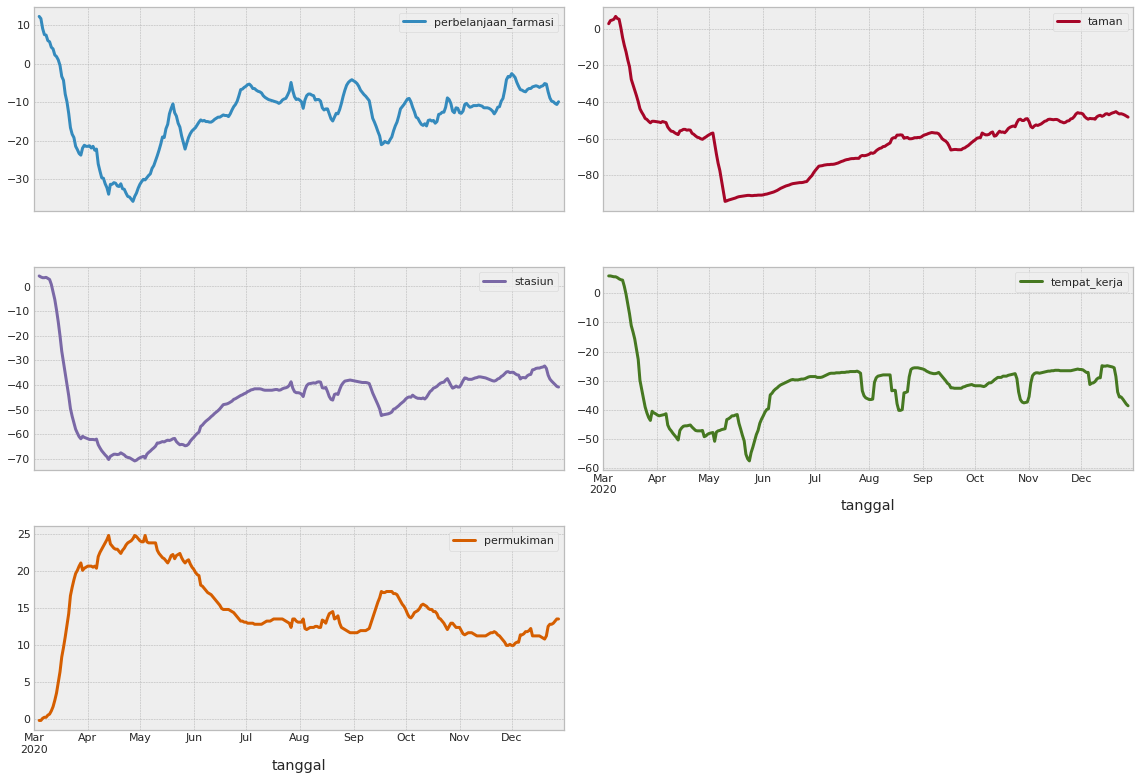

In [459]:
trend_dict = {}

for col in mobility.columns[1:]:
  decompositions = sm.tsa.seasonal_decompose(mobility[col])
  trend_dict[col] = decompositions.trend


rcParams["figure.figsize"] = 16, 14
pd.DataFrame(trend_dict).plot(
    subplots=True, layout=(4, 2), linewidth=3 )

Data berbentuk time series tidak dapat dianalisis berdasarkan seasonalitynya saja. Apabila hanya menganalisis seasonalitynya saja maka tidak dapat meninjau jumlah peningkatan secara keseluruhan tetapi hanya meninjau dari satu data waktu sebelumnya. Oleh karena itu, diperlukan peninjauan secara menyeluruh yaitu dengan melihat trendline dari data itu sendiri.

Berdasarkan grafik di atas, dapat dilihat bahwa untuk tempat retail_rekreasi, perbelanjaan_farmasi, taman, stasiun, dan tempat kerja memiliki kemiripan pola. Pola tersebut menunjukkan penurunan drastis dari bulan maret sampai sekitar bulan mei. Kemudian dilanjutkan dengan peningkatan sebesar setengah dari penurunan sebelumnya. Setelah itu, sekitar bulan juli, trend yang sebelumnya meningkat mengalami perlambatan sehingga membentuk grafik yang cenderung datar. Di Lain sisi, pemukiman menunjukkan  trendline yang berkebalikan di awal. Hal itu dapat dilihat ketika tempat lain di rentang Bulan Maret-Mei mengalami penurunan, pemukiman mengalami peningkatan. Setelah mengalami peningkatan, trendline mengalami perlambatan sehingga membentuk grafik yang cenderung datar sama seperti tempat yang lain. Trendline berkebalikan ini memiliki kelogisan, ketika seorang melakukan mobilisasi di tempat umum maka secara otomatis di pemukiman tidak dilakukan mobilisasi. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6129748a90>,
      dtype=object)

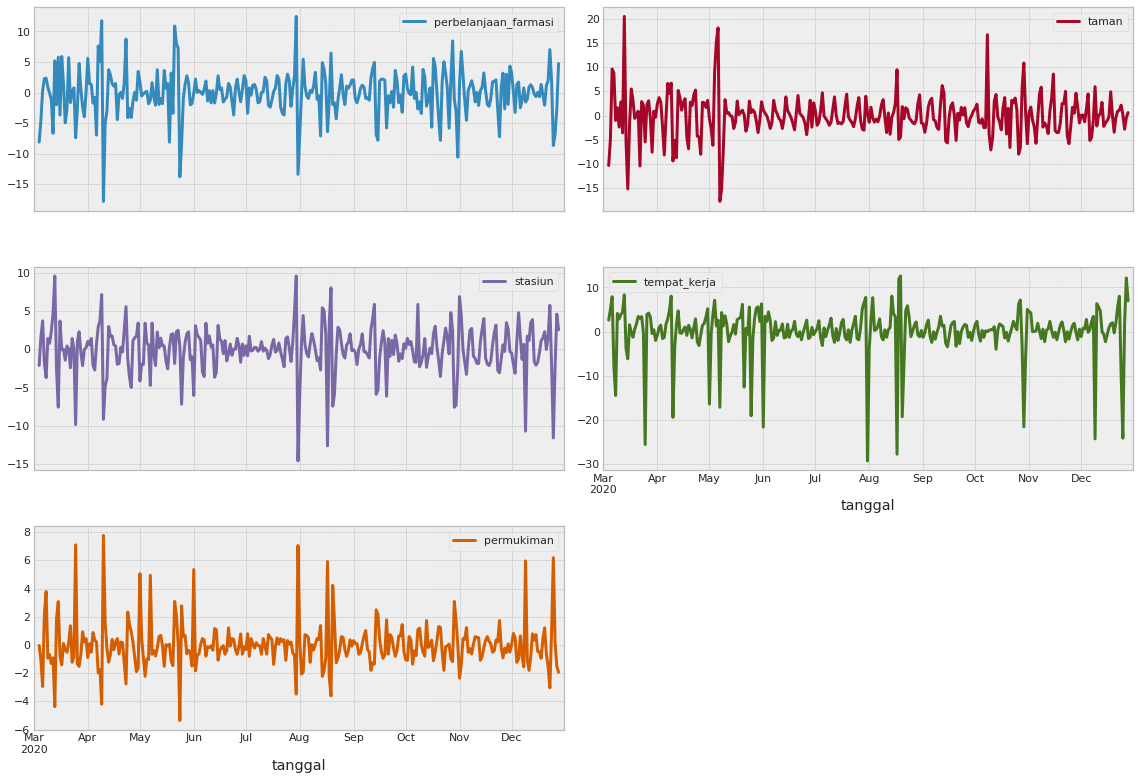

In [460]:
resid_dict = {}

for col in mobility.columns[1:]:
  decompositions = sm.tsa.seasonal_decompose(mobility[col])
  resid_dict[col] = decompositions.resid


rcParams["figure.figsize"] = 16, 14
pd.DataFrame(resid_dict).plot(
    subplots=True, layout=(4, 2), linewidth=3 )

Selain mempertimbangkan seasonality dan trend dari suatu data, ada hal lain yang perlu ditinjau. Hal itu adalah adanya noise dari suatu kumpulan data. Noise merupakan suatu data yang tidak memiliki korelasi dengan data-data yang lainnya. Keberadaan noise dari suatu data dapat dilihat dari adanya penyimpangan yang jauh pada grafik. Dengan demikian, data yang menjadi noise tidak dapat dimasukkan dalam mencari korelasi antar setiap variabel.

## 3.3 Korelasi Antarvariabel

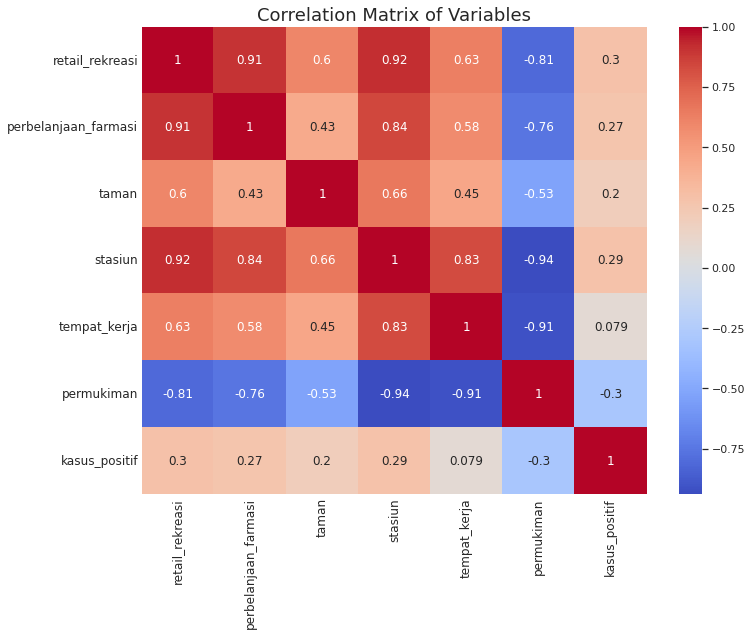

In [461]:
# Generate correlation matrix for the continuous variables
fig, ax = plt.subplots(figsize=(11, 9))

sns.set(font_scale=1.0)
sns.heatmap(df.corr(), 
            annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of Variables", fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
plt.show()

Dengan menggunakan heatmap correlation dapat dilihat bagaimana setiap variabel saling berkorelasi. Dari heatmap yang didapat, variabel mobilitas pemukiman memiliki korelasi negatif dengan variabel-variabel lainnya. Hal ini masuk akal dikarenakan mobilitas di pemukiman yang rendah menunjukkan bahwa penghuninya sedang pergi ke luar sehingga mobilitas di tempat lain jadi meningkat. Selain itu,heatmap juga menunjukkan bahwa kasus_positif tidak memiliki korelasi yang kuat dengan variabel-variabel lainnya. Angka terbesar(baik plus atau minus) dari korelasi yang didapatkan antara kasus_positif dengan variabel lainnya hanya bernilai 0.3 atau -0.3. Dengan kata lain, korelasi ini tergolong rendah sehingga pemodelan tidak  dapat berhenti pada tahap mempertimbangkan hubungan antar variabel saja, melainkan perlu dilanjutkan dengan mengecek apakah variabel kasus_positif memiliki hubungan dengan dirinya sendiri pada waktu-waktu yang berbeda. Untuk melakukan hal tersebut dapat digunakan tools yang dinamakan autocorrelation.



## 3.4 Autokorelasi

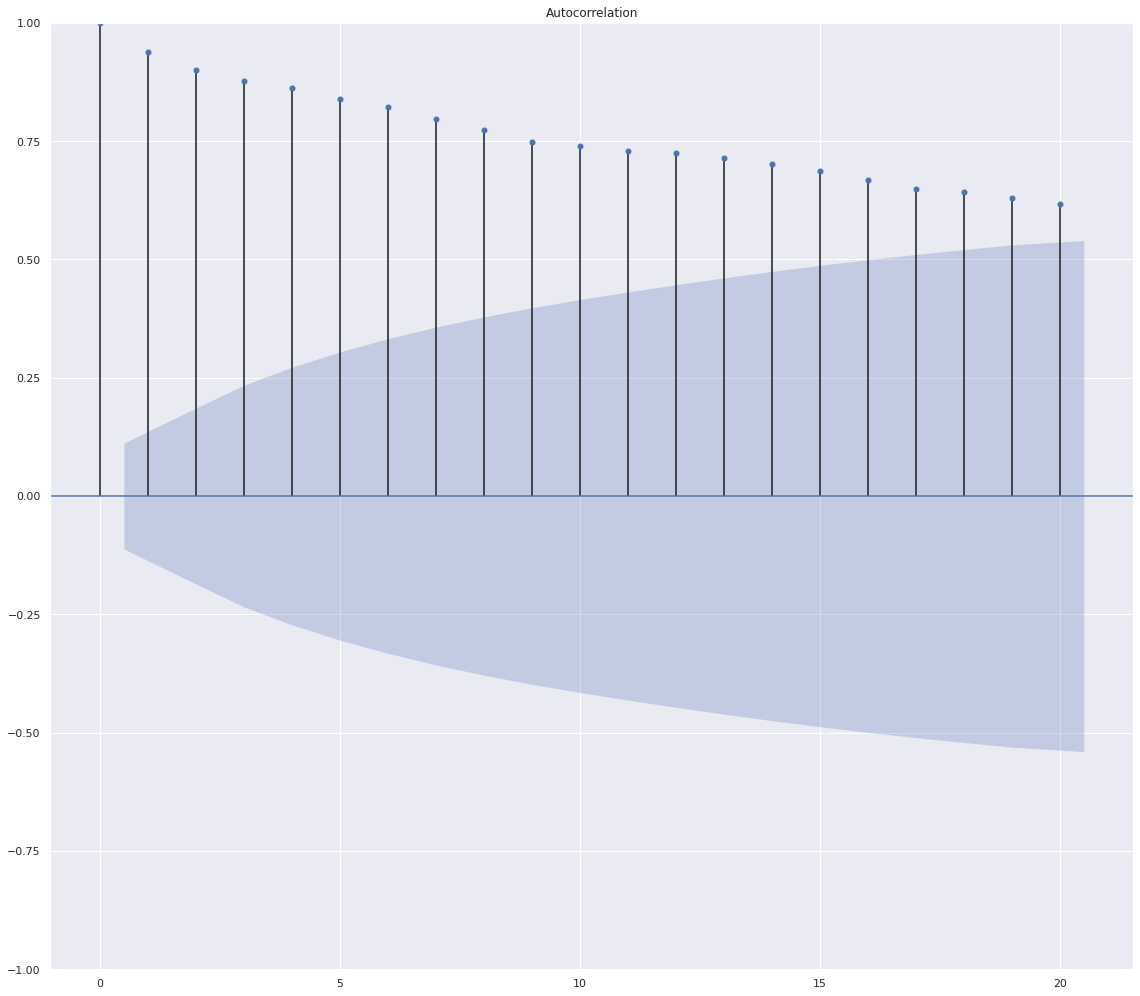

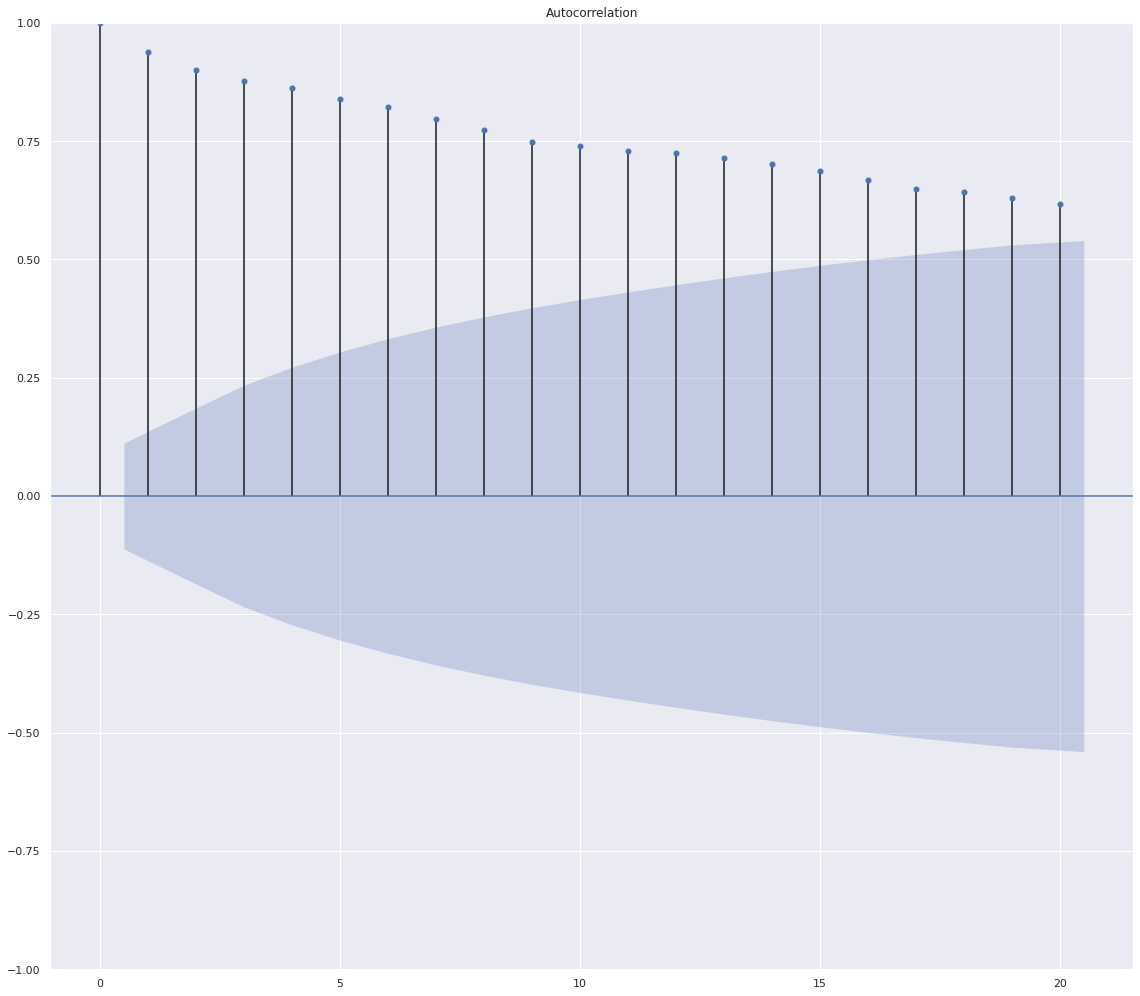

In [547]:
plot_acf(df.kasus_positif, lags=20, alpha=0.05)

# **4. Machine Learning Modelling**

Untuk memudahkan proses modelling, perlu dilakukan separasi antara data yang digunakan untuk melatih dan menguji model. Persentase separasi yang digunakan adalah 80% untuk data train dan 20% untuk data test.

In [465]:
train = df[:245]
test = df[245:]

Setelah dilakukan separasi train dan test, dilakukan pula pemisahan antara data variabel independen dengan variabel target.

In [466]:
x_col = df.columns
x_col = x_col[:-1:]

X_train = train[x_col]
y_train = train['kasus_positif']
X_test = test[x_col]
y_test = test['kasus_positif']

Variabel target yang akan diprediksi merupakan variabel kontinu, sehingga model yang digunakan harus berjenis regresi. Untuk memilih model terbaik dari library scikit-learn, digunakan bantuan tools lazypredict.

In [467]:
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 17.87it/s]

[15:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [470]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,-1.52,-1.27,884.19,0.02
LGBMRegressor,-1.86,-1.57,940.47,0.03
RANSACRegressor,-1.94,-1.65,954.37,0.09
GradientBoostingRegressor,-2.09,-1.78,977.57,0.11
RandomForestRegressor,-2.12,-1.81,982.60,0.24
HistGradientBoostingRegressor,-2.13,-1.82,984.53,0.19
BaggingRegressor,-2.19,-1.87,994.20,0.05
XGBRegressor,-2.22,-1.89,997.89,0.03
ExtraTreesRegressor,-2.32,-1.99,1014.24,0.16


Pada tabel di atas, terdapat nilai R-squared dan RMSE untuk mengukur akurasi dari masing-masing model. Namun, R-squared kurang cocok digunakan untuk data yang bersifat deret waktu. Oleh karena itu, pemilihan model hanya mengacu kepada model dengan nilai RMSE yang terkecil, yaitu K-Neighbors Regressor.

In [471]:
predictions

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GammaRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,1001.44,904.40,783.11,888.00,479.11,536.87,479.11,518.00,724.52,563.54,...,1248.63,868.19,806.54,806.54,699.65,295.56,828.49,525.13,921.35,804.38
1,1001.44,910.20,621.42,1013.00,479.11,526.94,479.11,1013.00,1024.22,546.38,...,899.73,913.88,630.78,630.78,586.58,311.58,639.81,519.03,913.25,960.09
2,1013.44,856.80,605.23,1013.00,479.11,520.19,479.11,1122.00,990.93,526.24,...,807.70,896.68,612.18,612.18,579.82,311.66,618.54,512.18,1012.17,1063.93
3,1013.44,855.10,648.66,1013.00,479.11,517.80,479.11,1133.00,923.59,516.52,...,788.13,858.16,660.09,660.09,612.08,310.32,671.19,508.20,1012.17,1039.37
4,883.64,827.00,612.87,791.00,479.11,503.83,479.11,1133.00,809.95,493.40,...,729.60,827.60,621.54,621.54,585.12,305.46,629.63,496.65,867.27,759.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,881.25,983.90,583.91,80.00,479.11,509.76,479.11,826.00,829.33,542.42,...,907.44,776.10,589.45,589.45,561.31,294.56,593.73,508.48,722.33,863.76
57,881.25,859.40,651.00,1187.00,479.11,524.26,479.11,587.00,824.32,539.25,...,837.22,848.27,667.19,667.19,597.30,307.25,684.61,515.80,1063.54,1056.00
58,929.64,888.80,636.36,926.00,479.11,517.04,479.11,587.00,883.43,522.94,...,864.57,859.79,648.49,648.49,595.07,306.01,660.66,508.80,1004.01,1176.87
59,1005.83,816.70,662.60,1187.00,479.11,533.92,479.11,587.00,909.48,549.92,...,947.56,821.24,676.45,676.45,613.38,305.77,690.41,523.06,1007.89,1034.07


In [468]:
predictions['KNeighborsRegressor']

0     962.60
1     988.00
2    1049.20
3    1031.40
4     860.00
       ...  
56    995.80
57    978.60
58    981.60
59    820.40
60    913.40
Name: KNeighborsRegressor, Length: 61, dtype: float64

Gabungkan hasil prediksi yang telah didapat ke dalam dataframe test.

In [528]:
prediksi = predictions['KNeighborsRegressor'].to_frame()
prediksi.index = test.index
prediksi['KNeighborsRegressor'] = prediksi['KNeighborsRegressor'].astype(int)
test["prediksi_kasus"] = prediksi

In [529]:
test

,retail_rekreasi,perbelanjaan_farmasi,taman,stasiun,tempat_kerja,permukiman,kasus_positif,prediksi_kasus
tanggal,,,,,,,,
2020-11-01,-38,-15,-55,-31,-16,6,1165,962
2020-11-02,-30,-7,-52,-37,-31,12,1006,988
2020-11-03,-31,-9,-56,-39,-32,13,1038,1049
2020-11-04,-31,-12,-56,-40,-32,13,1147,1031
2020-11-05,-33,-14,-57,-42,-33,14,1185,860
...,...,...,...,...,...,...,...,...
2020-12-27,-36,-17,-53,-33,-11,8,2711,995
2020-12-28,-28,-6,-48,-40,-36,13,2461,978
2020-12-29,-29,-8,-49,-40,-38,14,2669,981


In [532]:
print('Nilai RMSE untuk K Neighbors Regressor adalah', math.sqrt(mean_squared_error(test['prediksi_kasus'], test['kasus_positif'])))

Nilai RMSE untuk K Neighbors Regressor adalah 884.5548755554131


In [534]:
test['kasus_positif'].describe()

count     61.00
mean    1646.41
std      591.41
min      951.00
25%     1180.00
50%     1466.00
75%     1956.00
max     3476.00
Name: kasus_positif, dtype: float64

Nilai RMSE yang didapat adalah sebesar 884,55 kasus. Angka ini masih berada di bawah rata-rata kasus pada data test yaitu 1646,61 sehingga model dapat dinyatakan akurat.

Untuk mengetahui perbandingan data aktual dengan data yang diprediksi secara visual, dilakukan plot sebagai berikut.

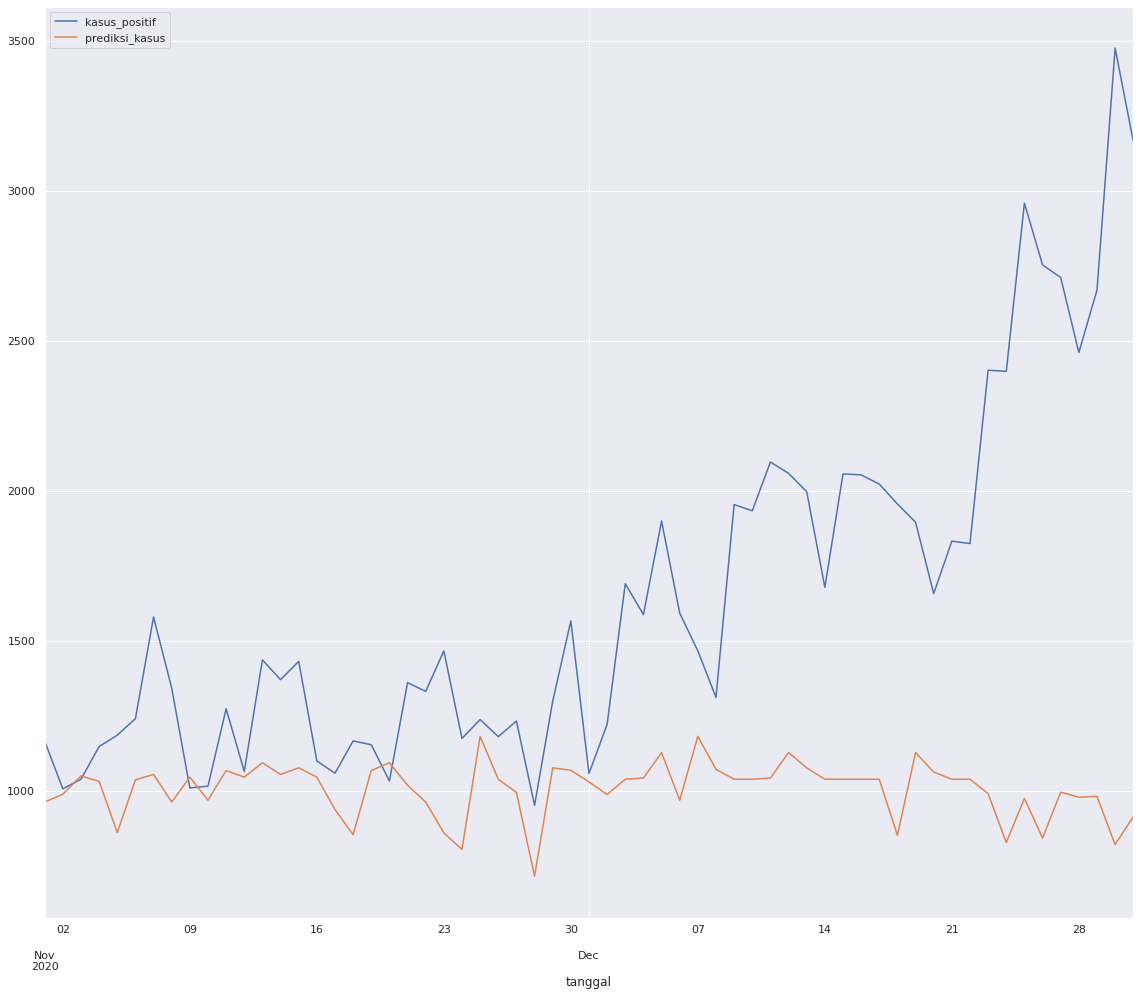

In [478]:
pd.concat([test['kasus_positif'],test['prediksi_kasus']],axis=1).plot()

Setelah model dievaluasi, dapat dilakukan percobaan untuk memprediksi data di masa mendatang. Pada kasus kali ini, digunakan data mobilitas dummy yang terjadi pada tanggal 1 Januari 2021 dengan rincian sebagai berikut.

In [523]:
data_prediksi = {
    'tanggal' : ['2021-01-01'],
    'retail_rekreasi': [31] ,
    'perbelanjaan_farmasi' : [-9] ,
    'taman' : [-56] ,
    'stasiun' : [-39] ,
    'tempat_kerja' : [10],
    'permukiman': [-3]
}

Dilakukan pengubahan data dictionary menjadi dataframe.

In [524]:
pred = pd.DataFrame.from_dict(data_prediksi, orient = 'columns')
pred['tanggal'] = pd.to_datetime(pred.tanggal, format = '%Y/%m/%d')
pred.index = pred.tanggal
pred = pred.drop('tanggal', axis = 1)

In [525]:
pred

,retail_rekreasi,perbelanjaan_farmasi,taman,stasiun,tempat_kerja,permukiman
tanggal,,,,,,
2021-01-01,31,-9,-56,-39,10,-3


Dilakukan pembentukan model K Neighbors Regressor sebagai berikut.

In [526]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

model = regressor.fit(X_train, y_train)

In [549]:
hasil = model.predict(pred)
print("Kasus positif COVID-19 yang ditimbulkan akibat mobilitas pada tanggal 1 Januari 2021 adalah sebesar:", hasil[0])

Kasus positif COVID-19 yang ditimbulkan akibat mobilitas pada tanggal 1 Januari 2021 adalah sebesar: 966.0


Hasil prediksi model untuk data-data mobilitas pada tanggal 1 Januari 2021 menunjukkan penambahan kasus positif COVID-19 sebesar 966 kasus pada 14 hari ke depan.

# **5. Conclusions**

Prediksi jumlah kasus positif harian DKI Jakarta melalui data mobilitas terhadap waktu telah dimodelkan. Model yang dihasilkan memiliki nilai RMSE, yakni 884,55. Nilai ini merupakan nilai yang dinilai baik karena berada di bawah nilai rata-rata, yakni 1646,41. Hal itu dikarenakan dari pengertian kasarnya, RMSE merupakan gambaran standar deviasi dari residual pada data. Dengan begitu, apabila didapatkan  nilai RMSE di bawah nilai rata-rata maka pemodelannya sudah cukup baik. Selain itu, melalui program ini juga telah diinterpretasikan model mobilitas warga DKI Jakarta secara mingguan di tiap sektor. Model mobilitas mingguan di tiap sektor ini penting untuk diketahui oleh Pemerintah DKI Jakarta untuk menentukan waktu-waktu yang harus diperhatikan mobilitas sektornya.
Melalui interpretasi data dan model yang telah dibuat dapat diketahui prediksi jumlah kasus positif harian yang akan terjadi di 14 hari ke depan melalui data mobilitas harian. Prediksi ini dapat digunakan Pemerintah DKI Jakarta untuk menentukan urgensi kebijakan di hari-hari berikutnya, terutama urgensi kebijakan mengenai pembatasan sosial dengan cara melihat data mobilitas secara real time. Dalam hal ini, sebagai langkah pengujian, diasumsikan Pemerintah DKI Jakarta telah mencatat data mobilitas pada tanggal 1 Januari 2021.

Melalui program ini, peningkatan mobilitas ini diprediksi dapat menyebabkan kasus COVID-19 harian menjadi 966 kasus di tanggal 15 Januari 2021. Hal ini dengan catatan skema pembatasan yang dilakukan pemerintah masih sama dengan sebelumnya. Kemudian, dari  analisis korelasi, didapatkan informasi bahwa mobilitas di tempat retail_rekreasi, perbelanjaan_farmasi, dan stasiun menjadi variabel tiga tertinggi dalam peningkatan kasus covid harian.

Setelah melakukan interpretasi data dan prediksi, diharapkan Pemerintah DKI Jakarta dapat memberlakukan langkah tertentu agar kenaikan mobilitas pada tanggal tersebut tidak menimbulkan efek domino penyebaran COVID-19 di hari-hari berikutnya. Langkah yang bisa diambil adalah pembatasan sosial yang ketat di tempat umum khususnya retail_rekreasi, perbelanjaan_farmasi, dan stasiun terhitung mulai 2 Januari 2021. Diharapkan penyebaran yang terjadi di tanggal 1 Januari dari mobilitas tersebut tidak semakin meluas di tanggal 2 Januari 2021. Selain itu, melalui prediksi ini,  Pemerintah DKI Jakarta sebaiknya menggalakkan tes COVID-19 secara massal untuk orang-orang dengan mobilitas tinggi di tiga tempat sebelumnya sehingga kasus positif harian di tanggal 1 Januari 2021 segera terdeteksi dan pengidap akan mulai menjaga diri untuk tidak berkontak fisik dengan orang lain. Pada akhirnya, proses recovery di wilayah DKI Jakarta akan lebih cepat. 

# Daftar Pustaka

Arifa, F. N. (2022). Antisipasi Gelombang 3 COVID-19. *Isu Sepekan Bidang Kesejahteraan Sosial Pusat Penelitian Badan Keahlian Sekretariat Jenderal DPR RI*, 1.

Google. (2022, 07 08). Community Mobility Reports. Diambil kembali dari COVID-19 Community Mobility Reports: https://www.google.com/covid19/mobility

Jakarta Smart City, Dinas Kesehatan Provinsi DKI Jakarta, Pejabat Pengelola Informasi dan Dokumentasi, dan DISKOMINFOTIK DKI Jakarta. (2022, 07 09). *Pantauan COVID-19 Hari Ini*. Diambil kembali dari corona.jakarta.go.id: https://corona.jakarta.go.id/id


Satgas COVID-19 Indonesia. (2022, 07 10). Diambil kembali dari covid19.go.id: https://covid19.go.id

WHO. (2020). Coronavirus disease 2019 (COVID-19). Situation Report-73, 2.
